# Student Health Survey Anaylsis

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

In [2]:
# Importing the Economics Survey data
health_df = pd.read_csv('./data/health.csv')
health_df.head()

,id,Feet,Inches,Weight,Exercise per Week,Exercise Time,Read Label,Taste,Price,Nutrition,Presentation,Appearance,Health,Parents Overweight
0,68968,5,9,150.0,2 to 4 days a week,20 - 30 minutes,Sometime,1,2,3,4,Yes,Yes,No
1,46998,5,4,160.0,2 to 4 days a week,30 - 40 minutes,Sometime,3,1,4,2,Yes,Yes,Not sure
2,79024,5,9,150.0,I don't regularly exercise,Over an hour,Not too often,1,2,3,4,Yes,Yes,No
3,28231,6,0,250.0,I don't regularly exercise,20 - 30 minutes,Not too often,1,2,4,3,Yes,Yes,No
4,64508,5,5,125.0,5 to 7 days a week,Over an hour,Always,1,2,4,3,Yes,Yes,Yes


In [3]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 14 columns):
id                    1181 non-null int64
Feet                  1181 non-null int64
Inches                1181 non-null int64
Weight                1181 non-null float64
Exercise per Week     1181 non-null object
Exercise Time         1181 non-null object
Read Label            1181 non-null object
Taste                 1181 non-null int64
Price                 1181 non-null int64
Nutrition             1181 non-null int64
Presentation          1181 non-null int64
Appearance            1181 non-null object
Health                1181 non-null object
Parents Overweight    1181 non-null object
dtypes: float64(1), int64(7), object(6)
memory usage: 129.3+ KB


In [4]:
health_df.describe(include='all')

,id,Feet,Inches,Weight,Exercise per Week,Exercise Time,Read Label,Taste,Price,Nutrition,Presentation,Appearance,Health,Parents Overweight
count,1181.000000,1181.000000,1181.000000,1181.000000,1181,1181,1181,1181.000000,1181.000000,1181.000000,1181.000000,1181,1181,1181
unique,NaN,NaN,NaN,NaN,6,6,5,NaN,NaN,NaN,NaN,2,2,3
top,NaN,NaN,NaN,NaN,2 to 4 days a week,Over an hour,Sometime,NaN,NaN,NaN,NaN,Yes,Yes,No
freq,NaN,NaN,NaN,NaN,404,387,369,NaN,NaN,NaN,NaN,1095,1122,799
mean,49413.778154,5.165961,5.502964,150.363506,NaN,NaN,NaN,2.099069,2.340390,2.556308,3.004234,NaN,NaN,NaN
std,29649.141674,0.601884,3.405783,39.387105,NaN,NaN,NaN,1.121216,1.012282,1.023249,1.109657,NaN,NaN,NaN
min,35.000000,0.000000,0.000000,13.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,22869.000000,5.000000,3.000000,125.000000,NaN,NaN,NaN,1.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN
50%,50819.000000,5.000000,6.000000,145.000000,NaN,NaN,NaN,2.000000,2.000000,3.000000,3.000000,NaN,NaN,NaN
75%,74954.000000,5.000000,8.000000,170.000000,NaN,NaN,NaN,3.000000,3.000000,3.000000,4.000000,NaN,NaN,NaN


In [5]:
health_cat = health_df[['Exercise per Week', 'Exercise Time', 'Read Label', 'Appearance', 'Health', 'Parents Overweight']]

In [6]:
# Report the repsonses in each column
for i in health_cat.columns[0:6]:
    print(f'Total Counts Table: {i}')
    table = health_cat[i].value_counts()
    print(table) 
    print('')
    print(f'Proportion Table: {i}')
    prop = health_cat[i].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(prop)
    print('-----------------------------------------')

Total Counts Table: Exercise per Week
2 to 4 days a week            404
I don't regularly exercise    299
Once a week                   255
5 to 7 days a week            152
2 - 4 days a week              49
5 - 7 days a week              22
Name: Exercise per Week, dtype: int64

Proportion Table: Exercise per Week
2 to 4 days a week            34.21%
I don't regularly exercise    25.32%
Once a week                   21.59%
5 to 7 days a week            12.87%
2 - 4 days a week              4.15%
5 - 7 days a week              1.86%
Name: Exercise per Week, dtype: object
-----------------------------------------
Total Counts Table: Exercise Time
Over an hour       387
40 - 50 minutes    219
30 - 40 minutes    215
20 - 30 minutes    202
10 - 20 minutes    118
over an hour        40
Name: Exercise Time, dtype: int64

Proportion Table: Exercise Time
Over an hour       32.77%
40 - 50 minutes    18.54%
30 - 40 minutes     18.2%
20 - 30 minutes     17.1%
10 - 20 minutes     9.99%
over an hou

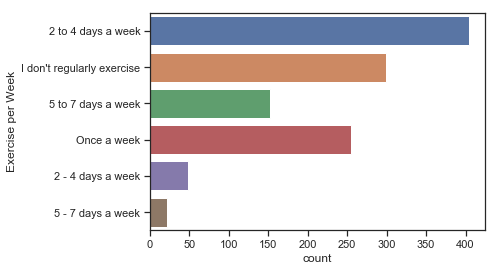

In [7]:
# Plot the students' responses with horizontal bar plot
ax = sns.countplot(y=health_df['Exercise per Week'])

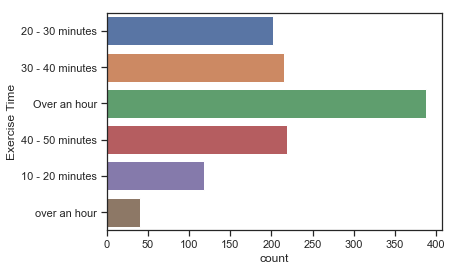

In [8]:
ax = sns.countplot(y=health_df['Exercise Time'])

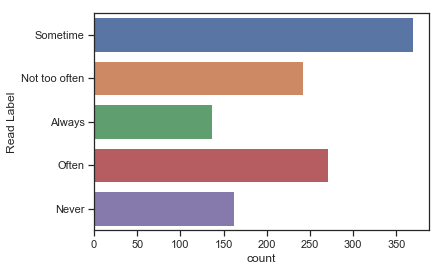

In [9]:
ax = sns.countplot(y=health_df['Read Label'])

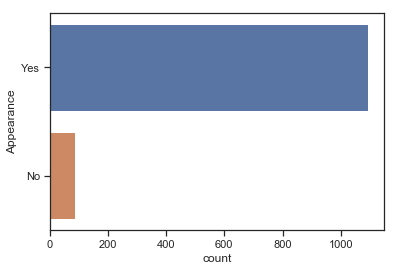

In [10]:
ax = sns.countplot(y=health_df['Appearance'])

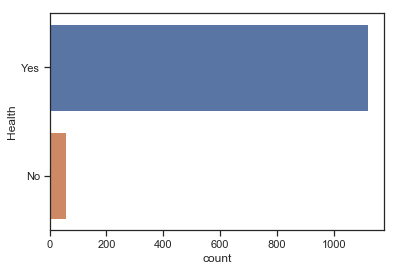

In [11]:
ax = sns.countplot(y=health_df['Health'])

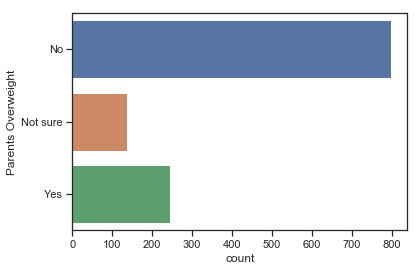

In [12]:
ax = sns.countplot(y=health_df['Parents Overweight'])

<function matplotlib.pyplot.show(*args, **kw)>

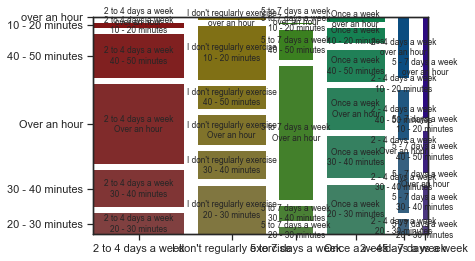

In [13]:
# plot from a contingency graph for exercise
mosaic(health_df, ['Exercise per Week', 'Exercise Time'], gap=0.05);
plt.show

In [14]:
health_df['height'] = health_df['Feet']*12 + health_df['Inches']
health_df['height'].describe()

count    1181.000000
mean       67.494496
std         6.987471
min         0.000000
25%        64.000000
50%        67.000000
75%        70.000000
max       143.000000
Name: height, dtype: float64

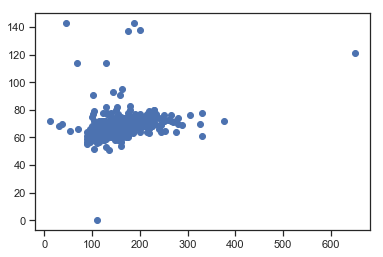

In [15]:
plt.scatter(health_df['Weight'], health_df['height'])